In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Read the CSV file into a pandas DataFrame

df = pd.read_csv("New Inventory.csv",)
df.head()

,Item Number,Inventory Receive,Total Item Qty
0,064-13-0002,7/7/2023,700
1,064-13-0338,7/7/2023,1700
2,064-13-0340,7/7/2023,1000
3,064-13-0353,7/7/2023,1900
4,064-13-0416,7/7/2023,1000


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Item Number        1039 non-null   object
 1   Inventory Receive  1039 non-null   object
 2   Total Item Qty     1039 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 24.5+ KB
None


In [3]:
df['Inventory Receive'] = pd.to_datetime(df['Inventory Receive'])

In [4]:
type(df['Inventory Receive'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
df['Item Number']=df['Item Number'].str.replace('-','').astype(int)

In [6]:
df_cleaned = df.pivot_table(index='Item Number', columns='Inventory Receive',dropna=True,fill_value='0')
df_cleaned.head()

Total Item Qty                                              \
Inventory Receive     2023-07-07 2023-07-09 2023-07-10 2023-07-14 2023-07-21   
Item Number                                                                    
64010003                       0          0          0          0          0   
64010005                       0          0          0          0          0   
64010012                       0          0          0          0          0   
64010013                       0          0          0          0          0   
64010016                       0          0          0          0          0   

                                                                          ...  \
Inventory Receive 2023-07-28 2023-08-04 2023-08-16 2023-08-18 2023-08-22  ...   
Item Number                                                               ...   
64010003                   0          0          0          0          0  ...   
64010005                   0          0          0          0          0  ...   
64010012                   0          0          0          0          0  ...   
64010013                   0          0          0          0          0  ...   
64010016                   0          0          0          0          0  ...   

                                                                          \
Inventory Receive 2023-09-22 2023-09-24 2023-09-29 2023-10-08 2023-10-13   
Item Number                                                                
64010003                   0          0     5488.0          0     1864.0   
64010005                   0          0     7380.0          0     2520.0   
64010012                   0          0     6840.0          0     3244.0   
64010013                   0          0     6300.0          0     1748.0   
64010016                   0          0     6028.0          0     1608.0   

                                                                          
Inventory Receive 2023-10-22 2023-11-26 2023-12-01 2023-12-08 2023-12-15  
Item Number                                                               
64010003                   0          0          0          0          0  
64010005                   0          0          0          0          0  
64010012                   0          0          0          0          0  
64010013                   0          0          0          0          0  
64010016                   0          0          0          0          0  

[5 rows x 23 columns]

In [7]:
# Assuming 'df' is your DataFrame that you want to save

# Save the entire DataFrame to a CSV file
file_path = 'cleaned_new_inventory.csv'  # Replace 'entire_dataframe.csv' with your desired file path and name
df_cleaned.to_csv(file_path, index=True)  # Set index=False to exclude the DataFrame index from the CSV file




In [8]:
df_cleaned3=df.groupby(df['Inventory Receive'].dt.strftime('%B'))['Total Item Qty'].sum().sort_values()
df_cleaned3

Inventory Receive
November      24848
December      63172
October      303826
September    670252
July         698592
August       726094
Name: Total Item Qty, dtype: int64

<Axes: xlabel='Inventory Receive'>

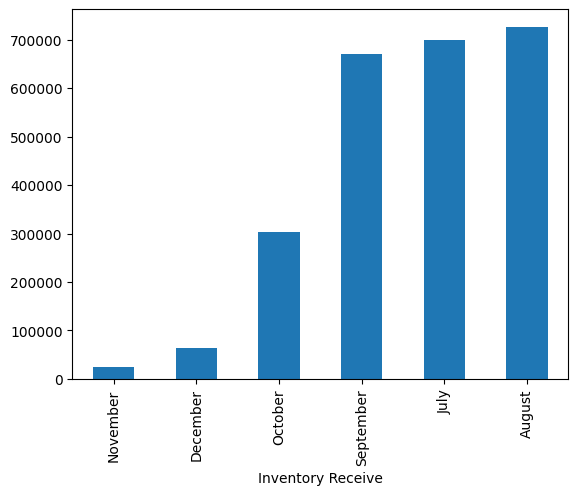

In [9]:
df_cleaned3.plot(x="Inventory Receive", y="Total Item Qty", kind="bar")